In [1]:
import sys
sys.path.append(".")
%cd ..

/mnt/sdb1/frasos/Bachelor2021


In [25]:
import pyforest 
from DataPrep.load_data import load_data
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [3]:
def prediction_of_change_in_direction(y_true, y_pred):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    true_sub = np.subtract(y_true[0:(len(y_true) - 1)], y_true[1:(len(y_true))])
    pred_sub = np.subtract(y_pred[0:(len(y_pred) - 1)], y_pred[1:(len(y_pred))])

    mult = true_sub * pred_sub
    result = 0
    for m in mult:
        if m > 0:
            result = result + 1

    return (100 * (result / len(y_true)))

In [5]:
mod = pd.read_csv("data\createdDat\ARIMAPred\ArimaModels.csv")

<IPython.core.display.Javascript object>

In [6]:
for i in range(8):
    print(mod[mod["AIC"]==min(mod["AIC"][mod["Label"]==i])])

     Unnamed: 0  Label   ar    d   ma           AIC
228         228    0.0  7.0  1.0  8.0  27887.564842
     Unnamed: 0  Label   ar    d   ma           AIC
587         587    1.0  9.0  1.0  7.0  28489.224356
     Unnamed: 0  Label   ar    d   ma           AIC
889         889    2.0  9.0  1.0  9.0  28114.320709
      Unnamed: 0  Label   ar    d   ma           AIC
1128        1128    3.0  7.0  1.0  8.0  30763.427777
      Unnamed: 0  Label   ar    d   ma           AIC
1459        1459    4.0  8.0  1.0  9.0  30045.479866
      Unnamed: 0  Label   ar    d   ma          AIC
1729        1729    5.0  7.0  1.0  9.0  30385.71825
      Unnamed: 0  Label   ar    d   ma           AIC
2028        2028    6.0  7.0  1.0  8.0  28924.916135
      Unnamed: 0  Label   ar    d   ma   AIC
2242        2242    7.0  4.0  2.0  2.0  14.0


In [44]:
df = load_data()

In [52]:
df = df[df["Label"]==1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

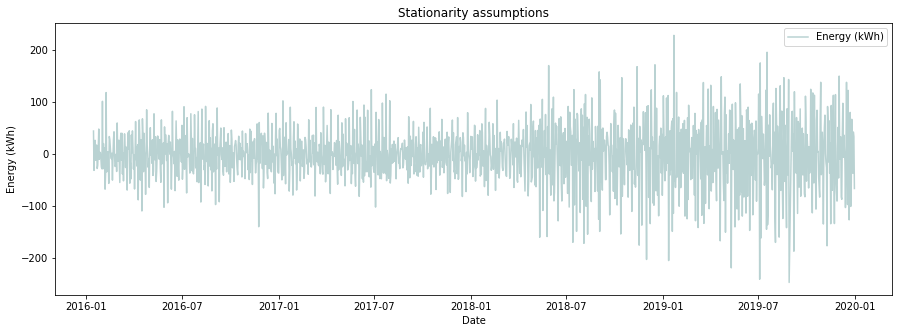

In [53]:
cmap = plt.cm.bone
plt.figure(figsize=(15,5))
plt.plot(df["Energy (kWh)"][df["Energy (kWh)"]>0].diff(), label = "Energy (kWh)", c=cmap(0.8))

#plt.plot(df["Energy (kWh)"][df["Energy (kWh)"]>0].diff().rolling(30).mean(), label="Mean", c="r")
#plt.plot(df["Energy (kWh)"][df["Energy (kWh)"]>0].rolling(30).std(), label="Standard deviation", c= cmap(0.4))
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.title("Stationarity assumptions")
plt.legend()
plt.show()

In [27]:
adfuller(df["Energy (kWh)"][df["Energy (kWh)"]>0].diff().dropna())

(-14.102075018398937,
 2.608025017059583e-26,
 19,
 1421,
 {'1%': -3.4349602407782758,
  '5%': -2.8635761009296763,
  '10%': -2.5678540089914974},
 14470.3392959003)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

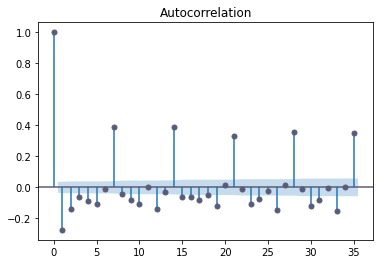

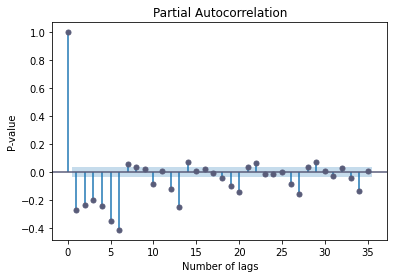

In [8]:
cmap = plt.cm.bone
plot_acf(df["Energy (kWh)"].diff().dropna(), color=cmap(0.4))
plot_pacf(df["Energy (kWh)"].diff().dropna(), color=cmap(0.4))
plt.xlabel("Number of lags")
plt.ylabel("P-value")
plt.show()

In [5]:
for i in range(1,12):
    df[f"Year_Month_{i}"][df[f"Year_Month_{i}"]==True]=df[f"Year_Month_{i}"][df[f"Year_Month_{i}"]==True].index.day==1

In [6]:
df[f"Year_Month_{df.index[0].month}"].iloc[0]=1

/home/frasos/Bachelor2021/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
df.drop(columns=["Charging Time (mins)","Parking Time (mins)", '# Professional & Other Places', '# Food', '# Shop & Service',
       '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event','Label_0', 'Label_1',
       'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7'])

Label  Energy (kWh)  Fee (USD)  Plugs_raw  \
Date                                                    
2011-07-29      1      0.000000   0.000000        NaN   
2011-07-30      1      0.000000   0.000000        NaN   
2011-07-31      1      0.000000   0.000000        NaN   
2011-08-01      1      0.000000   0.000000        NaN   
2011-08-02      1      0.000000   0.000000        NaN   
...           ...           ...        ...        ...   
2019-12-27      1    105.026253  40.601599       10.0   
2019-12-28      1     68.592827  25.026806       10.0   
2019-12-29      1    111.303000  25.590000       10.0   
2019-12-30      1    144.569147  40.261895       10.0   
2019-12-31      1     78.710853  19.568105       10.0   

            Number of NEMA 5-20R_raw  Plugs  Number of NEMA 5-20R  \
Date                                                                
2011-07-29                       NaN    NaN                   NaN   
2011-07-30                       NaN    NaN                   NaN   
2011-07-31                       NaN    NaN                   NaN   
2011-08-01                       NaN    NaN                   NaN   
2011-08-02                       NaN    NaN                   NaN   
...                              ...    ...                   ...   
2019-12-27                       0.0   10.0                   0.0   
2019-12-28                       0.0   10.0                   0.0   
2019-12-29                       0.0   10.0                   0.0   
2019-12-30                       0.0   10.0                   0.0   
2019-12-31                       0.0   10.0                   0.0   

            Month_Day_1  Month_Day_2  Month_Day_3  ...  Year_Month_6  \
Date                                               ...                 
2011-07-29            0            0            0  ...             0   
2011-07-30            0            0            0  ...             0   
2011-07-31            0            0            0  ...             0   
2011-08-01            1            0            0  ...             0   
2011-08-02            0            1            0  ...             0   
...                 ...          ...          ...  ...           ...   
2019-12-27            0            0            0  ...             0   
2019-12-28            0            0            0  ...             0   
2019-12-29            0            0            0  ...             0   
2019-12-30            0            0            0  ...             0   
2019-12-31            0            0            0  ...             0   

            Year_Month_7  Year_Month_8  Year_Month_9  Year_Month_10  \
Date                                                                  
2011-07-29             1             0             0              0   
2011-07-30             0             0             0              0   
2011-07-31             0             0             0              0   
2011-08-01             0             1             0              0   
2011-08-02             0             0             0              0   
...                  ...           ...           ...            ...   
2019-12-27             0             0             0              0   
2019-12-28             0             0             0              0   
2019-12-29             0             0             0              0   
2019-12-30             0             0             0              0   
2019-12-31             0             0             0              0   

            Year_Month_11  Year_Month_12  Holiday  Days_previous_holiday  \
Date                                                                       
2011-07-29              0              0        0                     25   
2011-07-30              0              0        0                     26   
2011-07-31              0              0        0                     27   
2011-08-01              0              0        0                     28   
2011-08-02              0              0        0      

In [8]:
df.columns

Index(['Label', 'Charging Time (mins)', 'Parking Time (mins)', 'Energy (kWh)',
       'Fee (USD)', '# Food', '# Shop & Service',
       '# Professional & Other Places', '# Nightlife Spot',
       '# Outdoors & Recreation', '# Arts & Entertainment',
       '# Travel & Transport', '# College & University', '# Event',
       '# Residence', 'Plugs_raw', 'Number of NEMA 5-20R_raw', 'Plugs',
       'Number of NEMA 5-20R', 'Label_0', 'Label_1', 'Label_2', 'Label_3',
       'Label_4', 'Label_5', 'Label_6', 'Label_7', 'Month_Day_1',
       'Month_Day_2', 'Month_Day_3', 'Month_Day_4', 'Month_Day_5',
       'Month_Day_6', 'Month_Day_7', 'Month_Day_8', 'Month_Day_9',
       'Month_Day_10', 'Month_Day_11', 'Month_Day_12', 'Month_Day_13',
       'Month_Day_14', 'Month_Day_15', 'Month_Day_16', 'Month_Day_17',
       'Month_Day_18', 'Month_Day_19', 'Month_Day_20', 'Month_Day_21',
       'Month_Day_22', 'Month_Day_23', 'Month_Day_24', 'Month_Day_25',
       'Month_Day_26', 'Month_Day_27', 'Month_Day_28

In [9]:
df["Year_Month_1"][df["Year_Month_1"]==True]=df["Year_Month_1"][df["Year_Month_1"]==True].index.day==1

<ipython-input-9-02f5e00ee63a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year_Month_1"][df["Year_Month_1"]==True]=df["Year_Month_1"][df["Year_Month_1"]==True].index.day==1


In [10]:
df["Year_Month_1"][df["Year_Month_1"]==1]

Date
2012-01-01    1
2013-01-01    1
2014-01-01    1
2015-01-01    1
2016-01-01    1
2017-01-01    1
2018-01-01    1
2019-01-01    1
Name: Year_Month_1, dtype: int64

In [5]:
pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_Label{0}.csv")
pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
pred = pred.set_index("Unnamed: 0")
pred[:-1].index
#df["Energy (kWh)"][df["Label"]==0][-len(pred)+1:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DatetimeIndex(['2012-08-06', '2012-08-07', '2012-08-08', '2012-08-09',
               '2012-08-10', '2012-08-11', '2012-08-12', '2012-08-13',
               '2012-08-14', '2012-08-15',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Unnamed: 0', length=2704, freq=None)

In [5]:
def plot_preds(test, pred, ax, label):
    x = np.linspace(min(test), max(test), 1000)
    ax.scatter(test,pred)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(f'Cluster: {label}')
    ax.text(10,max(test) - 15, r'$r^2 = $' + str(np.round(r2_score(test, pred), 3)), fontsize = 15)
    ax.text(10,max(test) - max(test)/6, f'RMSE = {np.round(np.sqrt(mean_squared_error(test, pred)),2)}',fontsize = 15)
    ax.text(10,max(test) - max(test)/10, f'POCID = {np.round(prediction_of_change_in_direction(test, pred),2)}',fontsize = 15)
    ax.plot(x,x, c = "red")

In [6]:
def ArimaPrediction(df,pred,label):
    cmap = plt.cm.bone
    cuts = pd.to_datetime(['2018-10-23','2019-06-15','2018-10-13','2018-10-18','2019-04-03','2019-04-18','2019-06-15','2019-05-20'])
    pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_Label{label}.csv")
    pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
    pred = pred.set_index("Unnamed: 0")
    pred = pred[pred.index>= cuts[label]]

    test_0, pred_0 = df["Energy (kWh)"][df["Label"]==label][-len(pred)+1:], pred[:-1]
    return test_0, pred_0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

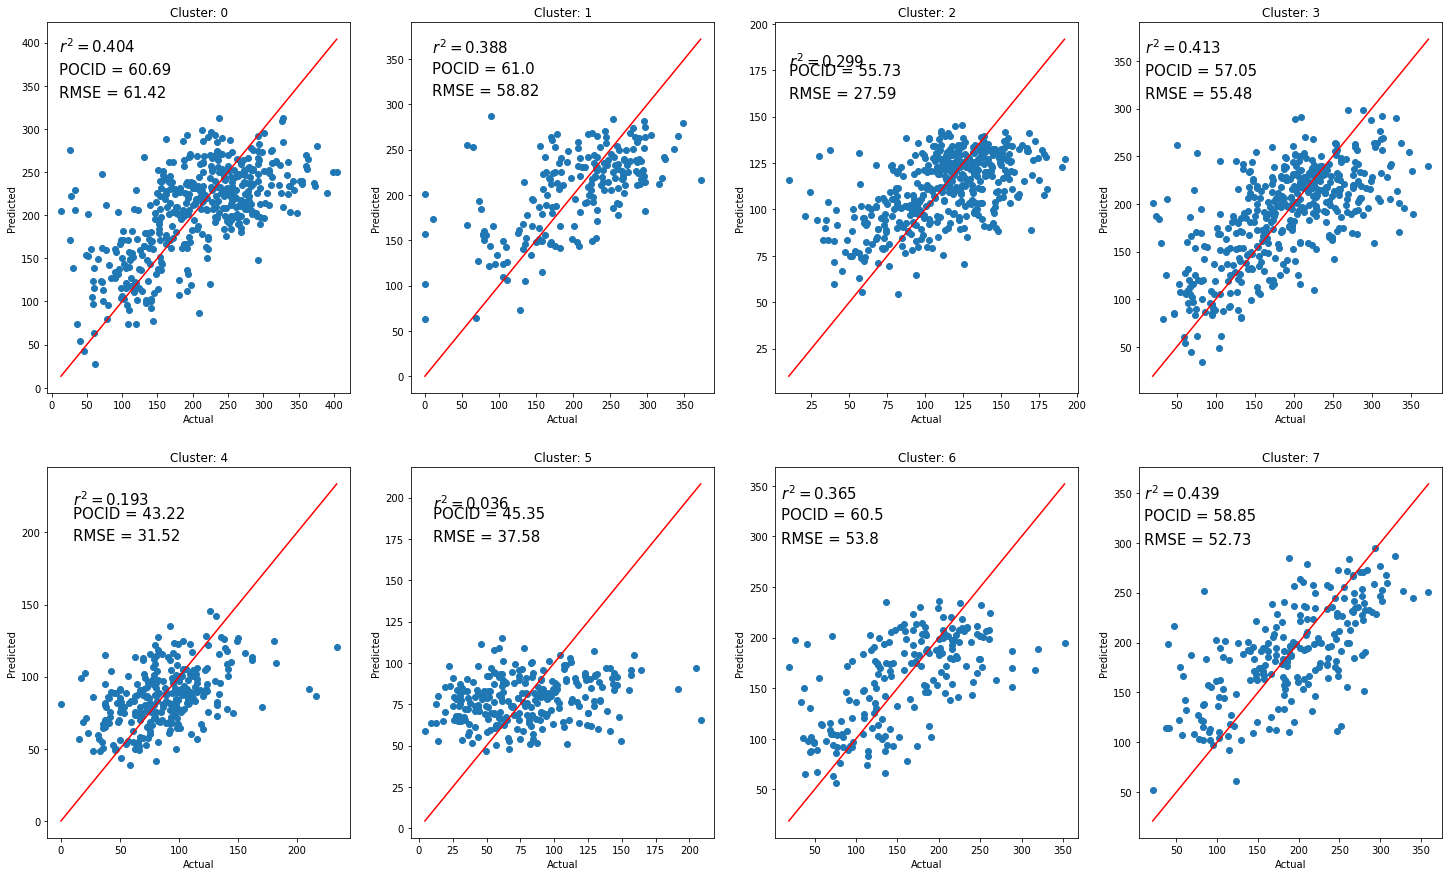

In [8]:
fig, ax = plt.subplots(2, 4, figsize = (25,15))
df = load_data()

test_0,pred_0 = ArimaPrediction(df,pred,0)
plot_preds(test_0, pred_0, ax[0][0], 0)

test_0,pred_0 = ArimaPrediction(df,pred,1)
plot_preds(test_0, pred_0, ax[0][1], 1)

test_0,pred_0 = ArimaPrediction(df,pred,2)
plot_preds(test_0, pred_0, ax[0][2], 2)

test_0,pred_0 = ArimaPrediction(df,pred,3)
plot_preds(test_0, pred_0, ax[0][3], 3)

test_0,pred_0 = ArimaPrediction(df,pred,4)
plot_preds(test_0, pred_0, ax[1][0], 4)

test_0,pred_0 = ArimaPrediction(df,pred,5)
plot_preds(test_0, pred_0, ax[1][1], 5)

test_0,pred_0 = ArimaPrediction(df,pred,6)
plot_preds(test_0, pred_0, ax[1][2], 6)

test_0,pred_0 = ArimaPrediction(df,pred,7)
plot_preds(test_0, pred_0, ax[1][3], 7)


In [10]:
df = load_data()
df1 = pd.DataFrame(columns=["Label0","Label1","Label2","Label3","Label4","Label5","Label6","Label7"])
for j in range(8):
    df1[f"Label{j}"] = df["Energy (kWh)"][df["Label"]==j]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

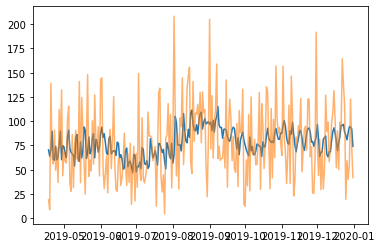

R^2: 0.035979006718393935


<IPython.core.display.Javascript object>

RMSE: 37.582587381297714


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

POCID: 45.348837209302324


In [14]:
cuts = pd.to_datetime(['2018-10-23','2019-06-15','2018-10-13','2018-10-18','2019-04-03','2019-04-18','2019-06-15','2019-05-20'])
pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_Label{5}.csv")
pred["0"][pred["0"]>1000]
#pred = pred[(pred.index!=1574) & (pred.index!=1597)]
pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
pred = pred.set_index("Unnamed: 0")
pred = pred[pred.index>= cuts[5]]

true = df["Energy (kWh)"][df["Label"]==5][pd.to_datetime(pred.index[:-1])]
plt.plot(pred[:-1])
plt.plot(true, alpha=0.6)
plt.show()

print(f'R^2: {r2_score(true,pred[:-1])}')
print(f'RMSE: {np.sqrt(mean_squared_error(true,pred[:-1]))}')
print(f'POCID: {prediction_of_change_in_direction(true,pred[:-1])}')

In [59]:
pred[pred<1]

0
Unnamed: 0    
2019-04-19 NaN
2019-04-20 NaN
2019-04-21 NaN
2019-04-22 NaN
2019-04-23 NaN
...         ..
2019-12-28 NaN
2019-12-29 NaN
2019-12-30 NaN
2019-12-31 NaN
2020-01-01 NaN

[256 rows x 1 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

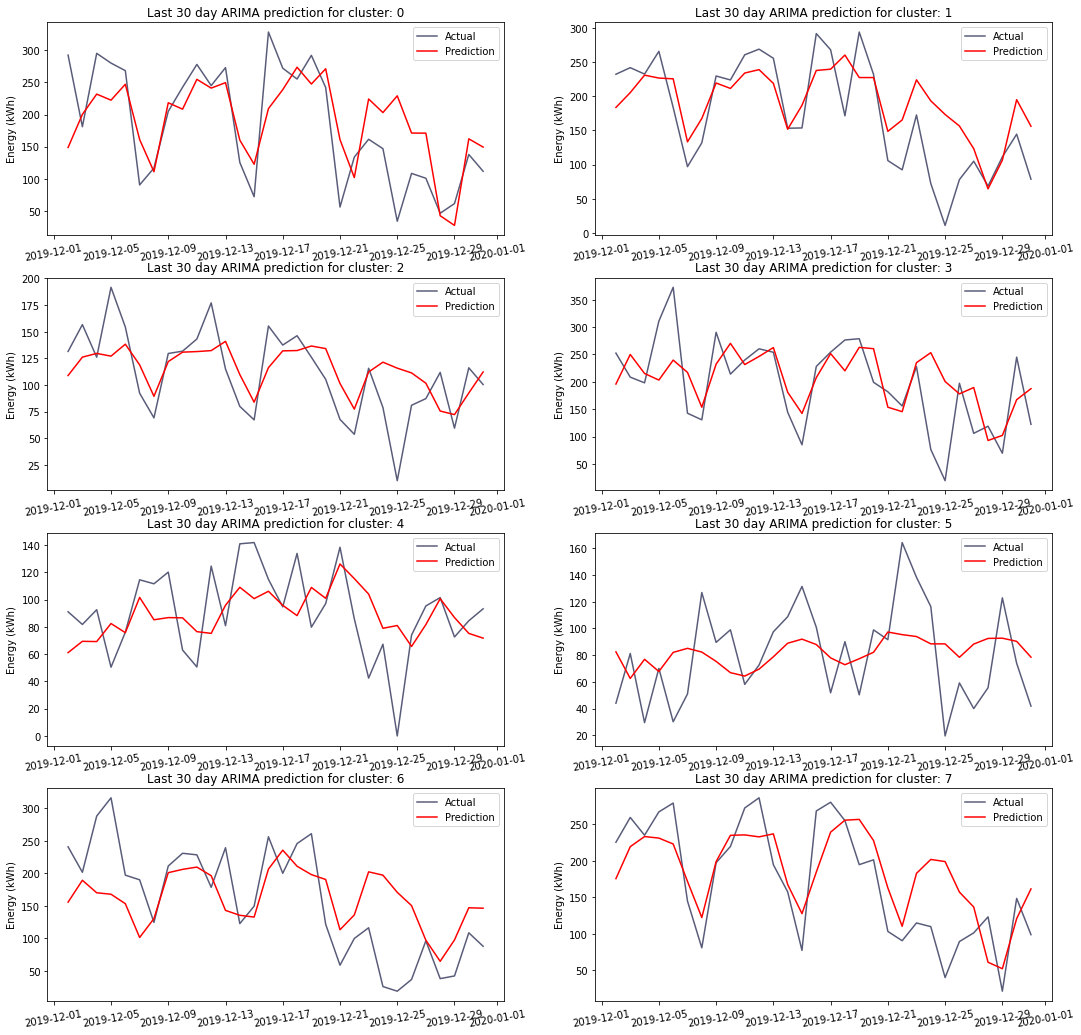

In [31]:
cmap = plt.cm.bone
cuts = pd.to_datetime(['2018-10-24','2019-06-14','2018-10-13','2018-10-18','2019-04-04','2019-04-19','2019-06-14','2019-05-20'])
fix,ax = plt.subplots(4,2, figsize=(18,18)) 
ax = np.ravel(ax)
for label in range(8):
    plt.setp( ax[label].xaxis.get_majorticklabels(), rotation=10 )fix,ax = plt.subplots(4,2, figsize=(18,18)) 
ax = np.ravelr label in range(8):
    plt.setp( ax[label].xaxis.get_majorticklabels(), rotation=10 )fix,ax = plt.subplots(4,2, figsize=(18,18)) 
ax = np.ravel(ax)
for label in range(8):
    plt.setp( ax[label].xaxis.get_majorticklabels(), rotation=10 )
    pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_window_Label{label}.csv")
    pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
    pred = pred.set_index("Unnamed: 0")
    pred = pred[pred.index>= cuts[label]]


    ax[label].plot(df["Energy (kWh)"][df["Label"]==label][-len(pred)+1:][-30:], label="Actual", color=cmap(0.4))
    #ax[label].set_xlabel("Date")
    ax[label].set_ylabel("Energy (kWh)")
    ax[label].set_title(f"Last 30 day ARIMA prediction for cluster: {label}")
    ax[label].plot(pred[-31:-1], label="Prediction", color="r")
    ax[label].legend()
plt.show()

    #print(f'R^2: {r2_score(df["Energy (kWh)"][df["Label"]==label][-len(pred)+1:],pred[:-1])}')
    #print(f'RMSE: {np.sqrt(mean_squared_error(df["Energy (kWh)"][df["Label"]==label][-len(pred)+1:],pred[:-1]))}')
    #print(f'POCID: {prediction_of_change_in_direction(df["Energy (kWh)"][df["Label"]==label][-len(pred)+1:],pred[:-1])}')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

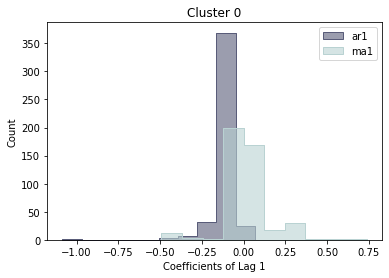

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

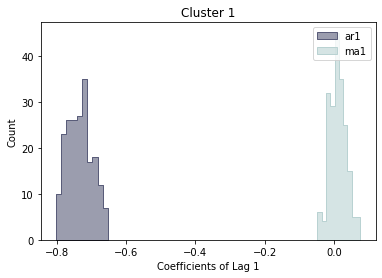

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

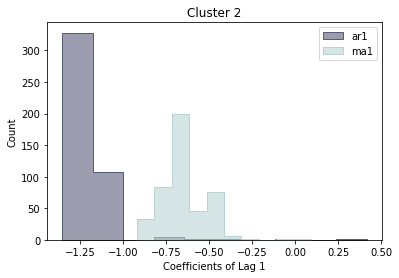

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

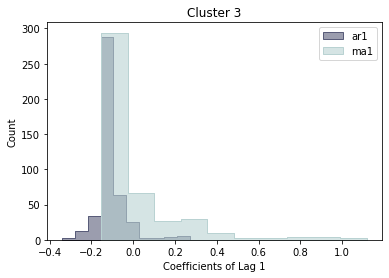

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

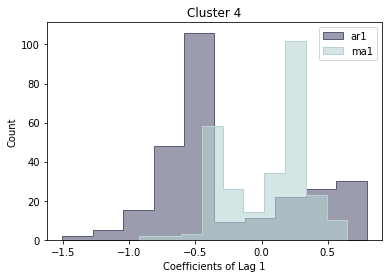

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

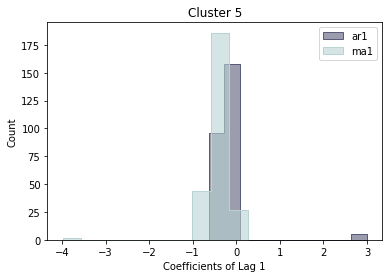

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

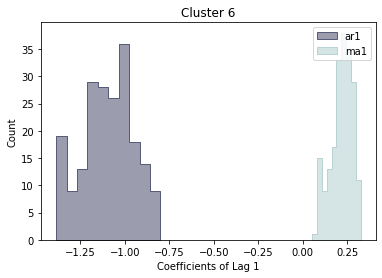

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

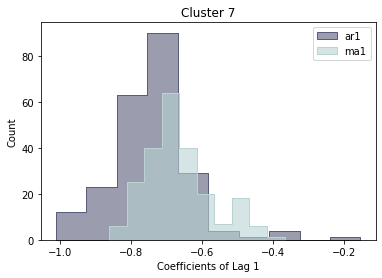

In [29]:
cmap = plt.cm.bone
cuts = pd.to_datetime(['2018-10-24','2019-06-14','2018-10-13','2018-10-18','2019-04-04','2019-04-19','2019-06-14','2019-05-20'])
for label in range(8):
    pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_window_Label{label}.csv")
    pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
    pred = pred.set_index("Unnamed: 0")
    pred = pred[pred.index>= cuts[label]]

    param = pd.read_csv(f"data\createdDat\ARIMA_Params_Label{label}.csv")
    #for lag in range(1,9):
    sns.histplot(param[f"ar.L{1}"][-len(pred):], label=f"ar{1}", alpha=0.6, bins=10, element="step", color=cmap(0.4))
    sns.histplot(param[f"ma.L{1}"][-len(pred):], label=f"ma{1}",alpha=0.6, bins=10,element="step", color=cmap(0.8))
    plt.xlabel("Coefficients of Lag 1")
    plt.title(f"Cluster {label}")
    plt.legend()
    plt.show()


In [8]:
param

Unnamed: 0     ar.L1     ar.L2     ar.L3     ar.L4     ar.L5     ar.L6  \
0              0 -0.716299 -0.199485 -0.232440 -0.395962 -0.446559  0.061981   
1              1 -0.105896  0.136979 -0.078664  0.010101 -0.116604 -0.031617   
2              2 -0.164863  0.042899 -0.157366 -0.055852 -0.121162 -0.016225   
3              3 -0.240982 -0.045130 -0.219448 -0.119389 -0.184655 -0.017770   
4              4 -0.107640  0.098146 -0.162161 -0.101287 -0.187853 -0.057184   
...          ...       ...       ...       ...       ...       ...       ...   
1451        1451 -0.742089 -0.100977 -0.081972 -0.077050 -0.083197 -0.083225   
1452        1452 -0.750134 -0.104615 -0.083967 -0.079660 -0.085017 -0.086064   
1453        1453 -0.744807 -0.124072 -0.089559 -0.084585 -0.090365 -0.091461   
1454        1454 -0.722328 -0.144255 -0.114313 -0.109406 -0.114037 -0.117277   
1455        1455 -0.746250 -0.077507 -0.077415 -0.075181 -0.078688 -0.081557   

         ar.L7     ar.L8  ar.L9  ...     ma.L2     ma.L3     ma.L4     ma.L5  \
0     0.611361  0.105923    NaN  ... -0.045630  0.263133  0.122507 -0.671497   
1     0.015262 -0.603858    NaN  ...  0.148248 -0.071761  0.077015 -0.176452   
2     0.047469 -0.526760    NaN  ...  0.128648 -0.082995  0.042498 -0.219989   
3     0.071392 -0.472805    NaN  ...  0.129716 -0.104408  0.020838 -0.249019   
4     0.001786 -0.599026    NaN  ...  0.175038 -0.047413  0.073331 -0.213597   
...        ...       ...    ...  ...       ...       ...       ...       ...   
1451  0.906359  0.652619    NaN  ... -0.035164 -0.017825  0.009948  0.013163   
1452  0.904324  0.657779    NaN  ... -0.036625 -0.016070  0.010250  0.014476   
1453  0.897885  0.646445    NaN  ... -0.037808 -0.016034  0.015624  0.014961   
1454  0.870136  0.596304    NaN  ... -0.040634 -0.018852  0.004242  0.014762   
1455  0.911007  0.659080    NaN  ... -0.037722 -0.009331  0.016746  0.015444   

         ma.L6     ma.L7     ma.L8  ma.L9       sigma2  Label  
0    -0.474137  0.525652 -0.102098    NaN  1308.120377    7.0  
1     0.363686  0.624988 -0.919162    NaN  1339.338597    7.0  
2     0.310695  0.610875 -0.847606    NaN  1346.920421    7.0  
3     0.264326  0.579115 -0.788418    NaN  1338.737850    7.0  
4     0.330949  0.609963 -0.899883    NaN  1328.725519    7.0  
...        ...       ...       ...    ...          ...    ...  
1451 -0.924990  0.027845  0.491384    NaN  2088.999517    7.0  
1452 -0.926983  0.035685  0.493472    NaN  2089.113186    7.0  
1453 -0.917057  0.043292  0.468518    NaN  2089.317941    7.0  
1454 -0.902222  0.075131  0.445810    NaN  2089.497455    7.0  
1455 -0.936813  0.027324  0.497962    NaN  2088.216837    7.0  

[1456 rows x 21 columns]

In [9]:
pred = pd.read_csv("VarPred_correct.csv")
pred["days_pred"] = pd.to_datetime(pred["days_pred"])
pred = pred.set_index("days_pred")
pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Label0      Label1     Label2      Label3     Label4  \
days_pred                                                              
2012-06-01   56.927880    0.000000  56.436466   28.401504   0.000000   
2012-06-02   42.728462    0.000000  36.978408   12.919845   0.000000   
2012-06-03   33.285831    0.000000  27.764473   11.951344   0.000000   
2012-06-04   37.202282    0.000000  37.461879   16.860032   0.000000   
2012-06-05   57.377362    0.000000  61.909631   34.106025   0.000000   
...                ...         ...        ...         ...        ...   
2019-12-28   83.068918   65.580387  62.556278   86.765798  66.348695   
2019-12-29  103.116818   95.939853  85.033419  128.369536  73.137142   
2019-12-30  128.765943  105.874606  96.594140  134.885666  54.312193   
2019-12-31  106.919595   86.948571  92.455826  147.890382  76.480220   
2020-01-01   58.625290   75.445535  63.573656   70.268718  81.159245   

               Label5     Label6      Label7  
days_pred                                     
2012-06-01   0.000000   0.000000    0.000000  
2012-06-02   0.000000   0.000000    0.000000  
2012-06-03   0.000000   0.000000    0.000000  
2012-06-04   0.000000   0.000000    0.000000  
2012-06-05   0.000000   0.000000    0.000000  
...               ...        ...         ...  
2019-12-28  96.392066  54.865198   99.337002  
2019-12-29  79.244098  74.103677  102.062017  
2019-12-30  85.027547  80.538142  111.769697  
2019-12-31  75.850192  61.587182   93.504434  
2020-01-01  76.662468  45.440032   64.391798  

[2771 rows x 8 columns]

In [15]:
pred.cumsum(axis=0)

Label0        Label1        Label2        Label3  \
days_pred                                                            
2012-06-02 -2.276667e+01  0.000000e+00 -2.461304e+01  2.878671e+00   
2012-06-03 -5.313529e+01  0.000000e+00 -1.997255e+01 -3.377337e+00   
2012-06-04 -4.829432e+01  0.000000e+00 -2.393274e+01 -7.939103e+00   
2012-06-05 -4.336043e+01  0.000000e+00 -3.285946e+01 -1.133569e+01   
2012-06-06 -2.815978e+01  0.000000e+00 -1.968188e+01 -1.097913e+01   
...                  ...           ...           ...           ...   
2019-12-28 -1.400378e+14 -6.913845e+11  2.964780e+14 -2.833547e+13   
2019-12-29 -1.400378e+14 -6.913845e+11  2.964780e+14 -2.833547e+13   
2019-12-30 -1.400378e+14 -6.913845e+11  2.964780e+14 -2.833547e+13   
2019-12-31 -1.400378e+14 -6.913845e+11  2.964780e+14 -2.833547e+13   
2020-01-01 -1.400378e+14 -6.913845e+11  2.964780e+14 -2.833547e+13   

                  Label4        Label5        Label6        Label7  
days_pred                                                           
2012-06-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2012-06-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2012-06-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2012-06-05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2012-06-06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
...                  ...           ...           ...           ...  
2019-12-28  1.200100e+14 -9.527320e+13 -3.288916e+11 -1.769018e+13  
2019-12-29  1.200100e+14 -9.527320e+13 -3.288916e+11 -1.769018e+13  
2019-12-30  1.200100e+14 -9.527320e+13 -3.288916e+11 -1.769018e+13  
2019-12-31  1.200100e+14 -9.527320e+13 -3.288916e+11 -1.769018e+13  
2020-01-01  1.200100e+14 -9.527320e+13 -3.288916e+11 -1.769018e+13  

[2770 rows x 8 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

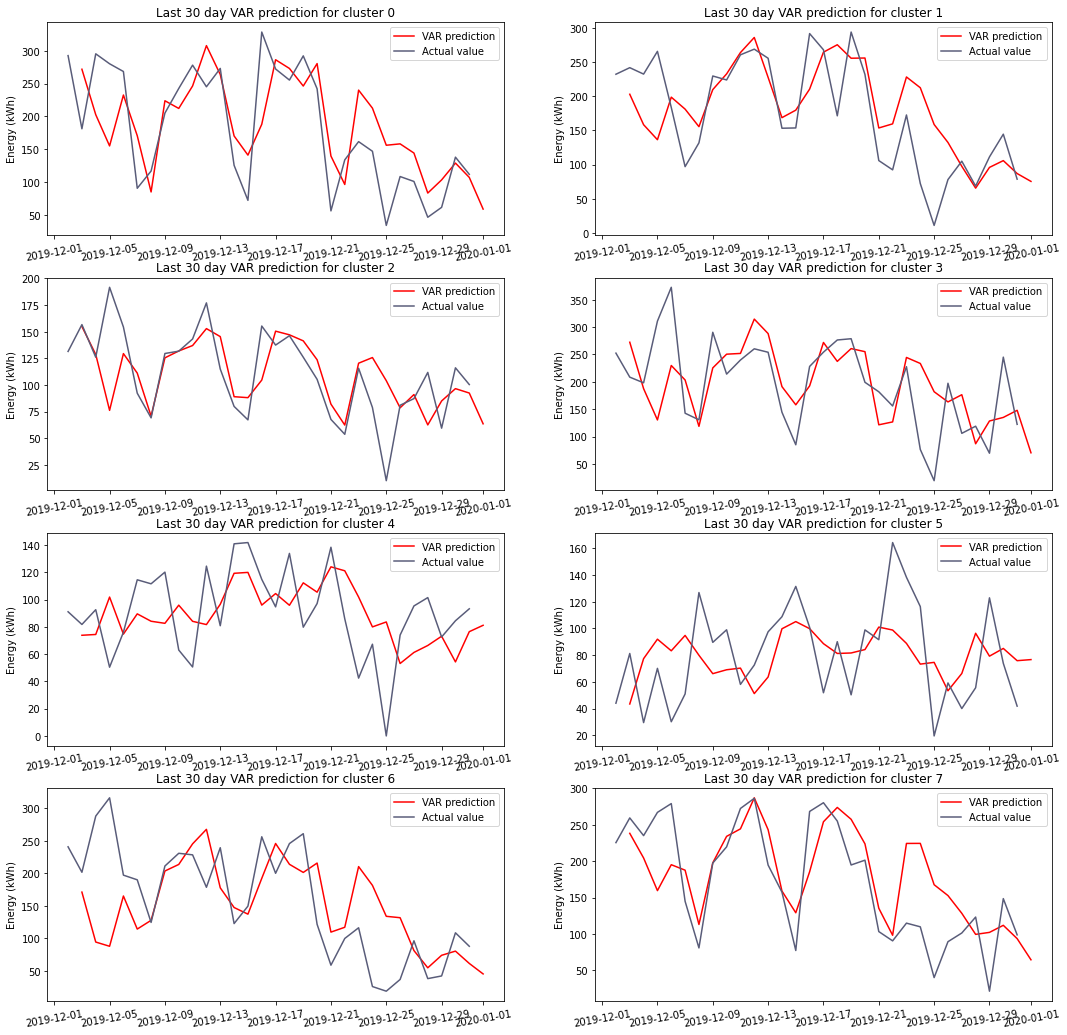

In [23]:
cmap = plt.cm.bone
cuts = pd.to_datetime(['2018-10-24','2019-06-14','2018-10-13','2018-10-18','2019-04-04','2019-04-19','2019-06-14','2019-05-20'])
fix,ax = plt.subplots(4,2, figsize=(18,18)) 
ax = np.ravel(ax)
for label in range(8):
    plt.setp( ax[label].xaxis.get_majorticklabels(), rotation=10 )
    pred1 = pred[f"Label{label}"][pred.index> cuts[label]]
    ax[label].plot(pred1[-30:], label=f"VAR prediction", color="r")
    ax[label].plot(df1[f"Label{label}"][-len(pred1):][-30:], label=f"Actual value", color=cmap(0.4))
    ax[label].set_title(f"Last 30 day VAR prediction for cluster {label}")
    #ax[label].xlabel("Data")
    ax[label].set_ylabel("Energy (kWh)")
    ax[label].legend()
plt.show()
    #print(prediction_of_change_in_direction(df1[f"Label{label}"][-len(pred1):],pred1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

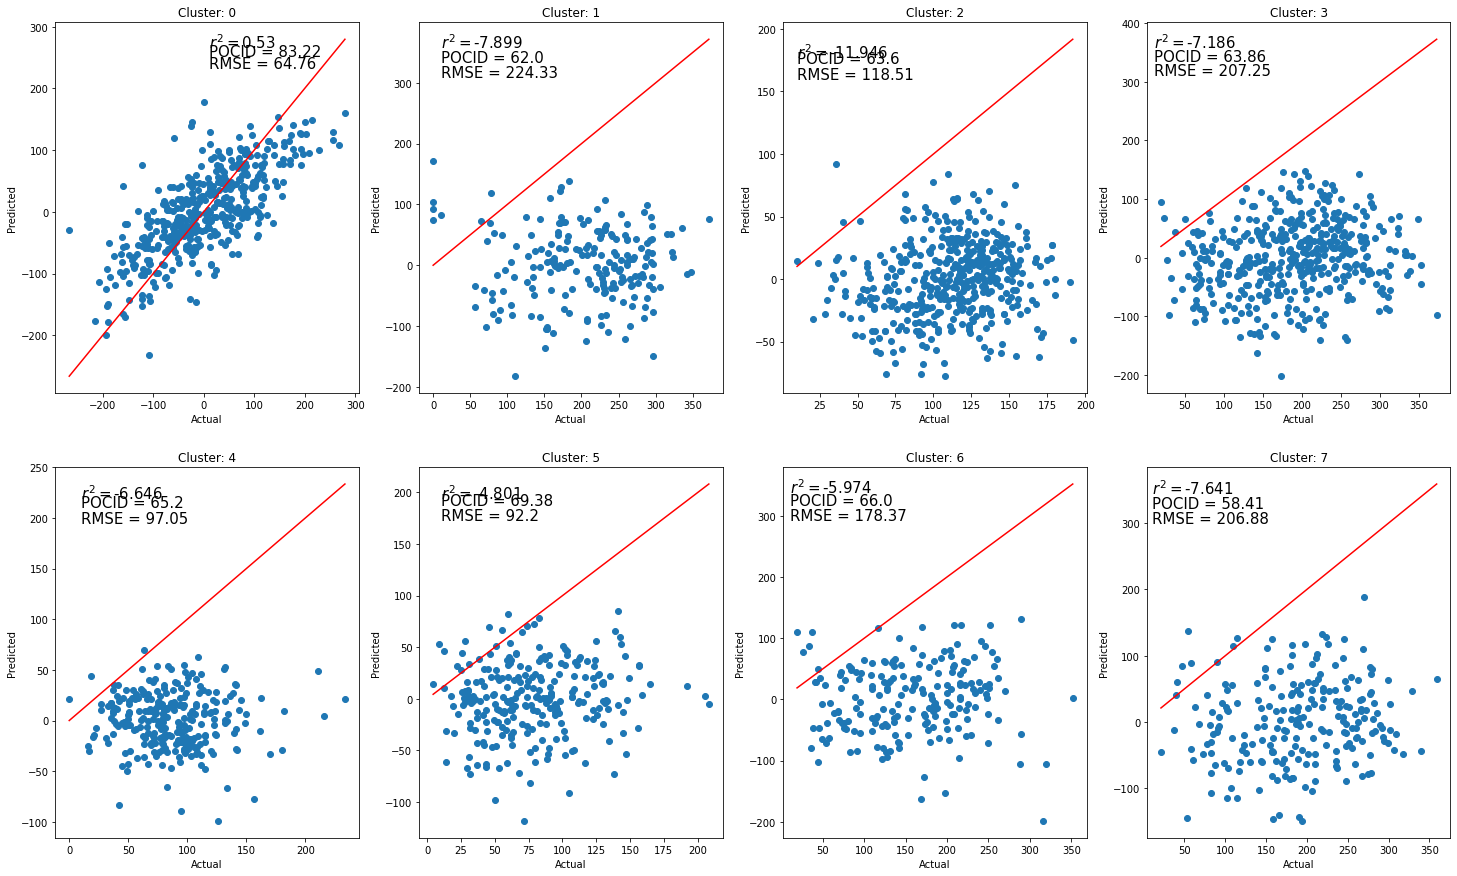

In [18]:
cuts = pd.to_datetime(['2018-10-23','2019-06-15','2018-10-13','2018-10-18','2019-04-03','2019-04-18','2019-06-15','2019-05-20'])
fig, ax = plt.subplots(2, 4, figsize = (25,15))

pred_i = pred["Label0"][pred.index>=cuts[0]][:-1]
plot_preds(df1["Label0"][-len(pred_i)-1:], pred_i, ax[0][0], 0)

pred_i = pred["Label1"][pred.index>=cuts[1]][:-1]
plot_preds(df1["Label1"][-len(pred_i):], pred_i, ax[0][1], 1)

pred_i = pred["Label2"][pred.index>=cuts[2]][:-1]
plot_preds(df1["Label2"][-len(pred_i):], pred_i, ax[0][2], 2)

pred_i = pred["Label3"][pred.index>=cuts[3]][:-1]
plot_preds(df1["Label3"][-len(pred_i):], pred_i, ax[0][3], 3)

pred_i = pred["Label4"][pred.index>=cuts[4]][:-1]
plot_preds(df1["Label4"][-len(pred_i):], pred_i, ax[1][0], 4)

pred_i = pred["Label5"][pred.index>=cuts[5]][:-1]
plot_preds(df1["Label5"][-len(pred_i):], pred_i, ax[1][1], 5)

pred_i = pred["Label6"][pred.index>=cuts[6]][:-1]
plot_preds(df1["Label6"][-len(pred_i):], pred_i, ax[1][2], 6)

pred_i = pred["Label7"][pred.index>=cuts[7]][:-1]
plot_preds(df1["Label7"][-len(pred_i):], pred_i, ax[1][3], 7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.696044353859155


<IPython.core.display.Javascript object>

RMSE: 38.20118547897148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

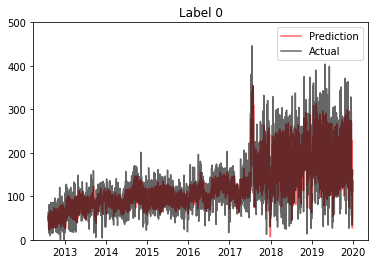

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.5821434504418037


<IPython.core.display.Javascript object>

RMSE: 40.47474014133973


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

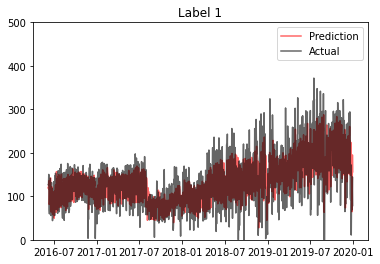

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.30987915821826606


<IPython.core.display.Javascript object>

RMSE: 28.64607486483018


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

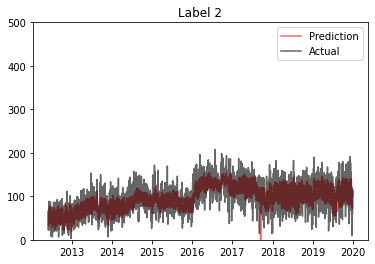

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: -21004904.989310455


<IPython.core.display.Javascript object>

RMSE: 399352.17056005495


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

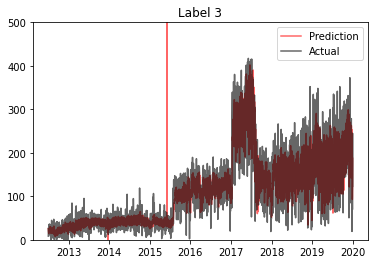

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.6899159821691695


<IPython.core.display.Javascript object>

RMSE: 32.70826155034918


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

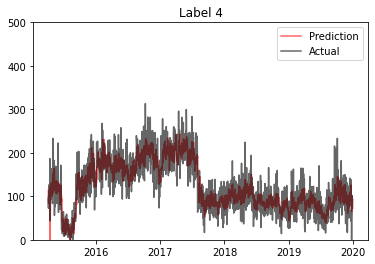

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: -8.573552314810412e+21


<IPython.core.display.Javascript object>

RMSE: 4377916287807.8477


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

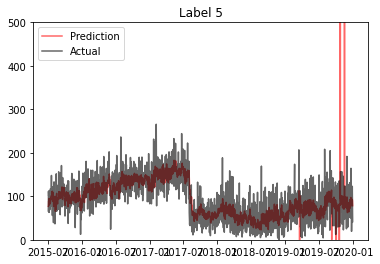

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.6283414337655995


<IPython.core.display.Javascript object>

RMSE: 35.585249706201424


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

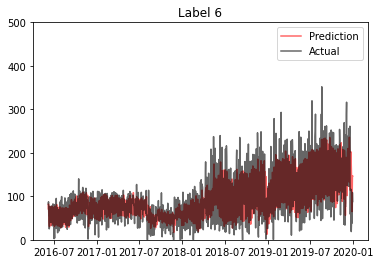

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.6471549376129735


<IPython.core.display.Javascript object>

RMSE: 45.874585930946836


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

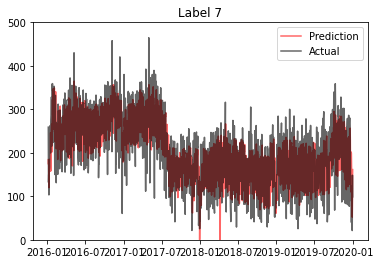

In [29]:
for i in range(8):
    pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_Label{i}.csv")
    pred["Unnamed: 0"] = pd.to_datetime(pred["Unnamed: 0"])
    pred = pred.set_index("Unnamed: 0")
    plt.plot(pred[:-1], label="Prediction", alpha=0.6, color="red")
    plt.plot(df["Energy (kWh)"][df["Label"]==i][-len(pred)+1:], label="Actual", alpha=0.6, color="black")
    plt.title(f"Label {i}")
    plt.ylim(0,500)
    print(f'R^2 score: {r2_score(df["Energy (kWh)"][df["Label"]==i][-len(pred)+1:],pred[:-1])}')
    print(f'RMSE: {np.sqrt(mean_squared_error(df["Energy (kWh)"][df["Label"]==i][-len(pred)+1:],pred[:-1]))}')
    plt.legend()
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R^2 score: 0.13164564248191968


<IPython.core.display.Javascript object>

RMSE: 29.521459091556505


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

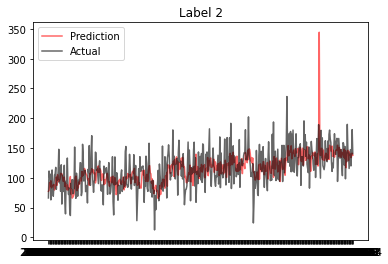

                     0
Unnamed: 0            
2015-07-04   77.450804
2015-07-05   78.920510
2015-07-06   92.127760
2015-07-07   85.631469
2015-07-08   95.030922
...                ...
2016-11-10  139.546604
2016-11-11  133.876227
2016-11-12  140.901008
2016-11-13  141.235902
2016-11-14  137.732290

[500 rows x 1 columns]
Date
2015-07-04     66.201064
2015-07-05    111.456402
2015-07-06    100.629435
2015-07-07    106.161869
2015-07-08     62.960126
                 ...    
2016-11-10    147.175000
2016-11-11    119.905000
2016-11-12    142.586000
2016-11-13    180.950571
2016-11-14    140.436519
Name: Energy (kWh), Length: 500, dtype: float64


In [87]:
i = 2
n = 500
pred = pd.read_csv(f"data\createdDat\ARIMA_Prediction_Label{i}.csv")
pred = pred.set_index("Unnamed: 0")
actual = df["Energy (kWh)"][df["Label"]==i][-len(pred)+1:]
pred = pred[:n]
actual = actual[:n]
plt.plot(pred, label="Prediction", alpha=0.6, color="red")
plt.plot(actual, label="Actual", alpha=0.6, color="black")
plt.title(f"Label {i}")
print(f'R^2 score: {r2_score(actual,pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(actual,pred))}')
plt.legend()
plt.show()